## Planning horizon experiment

For actual, predicted and errors in utilization, we calculate:
1. mean
2. variance
3. normalized variance: variance/mean

In [1]:
%matplotlib inline  
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from statistics import mean, median, variance 
import collections

def get_data_from_file(experiment_name, filename):
    with open("results/" + experiment_name + "/" + filename, 'r') as results:
        i =0
        all_data = []
        for line in results:
            i += 1            
            if i % 2 == 0:
                line = line.split(",")
                data_in_invocation = [abs(float(it)) for it in line]
                all_data.append(data_in_invocation)
    return all_data

def prepare_filename(data_kind, step_horizon, planning_steps, planning_period, alpha, beta, tick):
    return str(data_kind) + "_" + \
        str(step_horizon) + "-" + \
        str(planning_steps) + "-" + \
        str(planning_period) + "-" + \
        str(alpha) + "-" + \
        str(beta) + "-" + \
        str(tick) + ".csv"

def get_all_data(experiment_name, data_kind, step_horizons, 
                 planning_steps, planning_period, alpha, beta, tick):
    all_data = []
    for step_horizon in step_horizons:
        filename = prepare_filename(data_kind, step_horizon, 
                                    planning_steps, step_horizon, alpha, beta, step_horizon)
        data = get_data_from_file(experiment_name, filename)    
        flat_list = [item for sublist in data for item in sublist]
        all_data += flat_list
    return all_data  

def calculate_statistics(experiment_name, data_kind, step_horizons, 
                         planning_steps, planning_period, alpha, beta, tick):
    means = dict()
    variances = dict()
    norm_variances = dict(); 
    for step_horizon in step_horizons:
        filename = prepare_filename(data_kind, step_horizon, 
                                    planning_steps, step_horizon, alpha, beta, step_horizon)
        data = get_data_from_file(experiment_name, filename)               
        means[step_horizon] = [mean(d) for d in data]
        variances[step_horizon] = [variance(d) for d in data]
        norm_variances[step_horizon] = [variance(d)/mean(d) for d in data]
    return means, variances, norm_variances    

def calculate_errors(actual_statistics, predicted_statistics, seeds):   
    errors_statistics = dict()
    for step_horizon in step_horizons:
        actual_statistics_for_horizon = actual_statistics[step_horizon]
        predicted_statistics_for_horizon = predicted_statistics[step_horizon]
        errors_statistics_for_horizon = []
        for seed in seeds: 
            errors_statistics_for_seed = actual_statistics_for_horizon[seed] - predicted_statistics_for_horizon[seed]
            errors_statistics_for_horizon.append(errors_statistics_for_seed)
        errors_statistics[step_horizon] = errors_statistics_for_horizon
    return errors_statistics

def validate_data(d, step_horizons, seeds):
    assert(len(d["actual_means"]) == len(step_horizons))
    assert(len(d["actual_variances"]) == len(step_horizons))
    assert(len(d["actual_norm_variances"]) == len(step_horizons))

    assert(len(d["predicted_means"]) == len(step_horizons))
    assert(len(d["predicted_variances"]) == len(step_horizons))
    assert(len(d["predicted_norm_variances"]) == len(step_horizons))

    assert(len(d["error_means"]) == len(step_horizons))
    assert(len(d["error_variances"]) == len(step_horizons))
    assert(len(d["error_norm_variances"]) == len(step_horizons))

    assert(len(d["actual_means"][step_horizons[0]]) == len(seeds))
    assert(len(d["actual_variances"][step_horizons[0]]) == len(seeds))
    assert(len(d["actual_norm_variances"][step_horizons[0]]) == len(seeds))

    assert(len(d["predicted_means"][step_horizons[0]]) == len(seeds))
    assert(len(d["predicted_variances"][step_horizons[0]]) == len(seeds))
    assert(len(d["predicted_norm_variances"][step_horizons[0]]) == len(seeds))

    assert(len(d["error_means"][step_horizons[0]]) == len(seeds))
    assert(len(d["error_variances"][step_horizons[0]]) == len(seeds))
    assert(len(d["error_norm_variances"][step_horizons[0]]) == len(seeds))

print "helper methods loaded!"

helper methods loaded!


In [2]:
experiment_name = "planning-horizon"
step_horizons = [50,60,70]
seeds = range(3)

planning_steps = 1 
alpha = 0
beta = 0

d = dict()
d["actual_means"], d["actual_variances"], d["actual_norm_variances"] = \
    calculate_statistics(experiment_name, "actual", step_horizons, planning_steps, None, alpha, beta, None)
d["predicted_means"], d["predicted_variances"], d["predicted_norm_variances"] = \
    calculate_statistics(experiment_name, "predicted", step_horizons, planning_steps, None, alpha, beta, None)

d["error_means"] = calculate_errors(d["actual_means"], d["predicted_means"], seeds)
d["error_variances"] = calculate_errors(d["actual_variances"], d["predicted_variances"], seeds)
d["error_norm_variances"] = calculate_errors(d["actual_norm_variances"], d["predicted_norm_variances"], seeds)

print "data loaded!"

validate_data(d, step_horizons, seeds) 

print "data validated!"

statistics data loaded!
statistics data validated!


In [5]:
all_data = dict()
all_data["actual"] = get_all_data(experiment_name, "actual", step_horizons, planning_steps, None, alpha, beta, None)
all_data["predicted"] = get_all_data(experiment_name, "predicted", step_horizons, planning_steps, None, alpha, beta, None)

print "flattened data loaded! (to be used in plotting densities)"

flattened data loaded! (to be used in plotting densities)


In [6]:
def prepare_fig_title(experiment_name, seeds, planning_steps, alpha, beta):
    return "Experiment with %s (%s seeds) | planning steps: %s, alpha: %s, beta: %s" % \
        (experiment_name, seeds, planning_steps, alpha, beta)

def box_plot(fig_type):
    fig, ax = plt.subplots()
    ax.boxplot(d[fig_type].values(), labels = d[fig_type].keys())
    ax.set_title(prepare_fig_title(experiment_name, len(seeds), planning_steps, alpha, beta))
    ax.set_ylabel(fig_type.replace("_", " "))
    ax.set_xlabel(experiment_name)
    plt.show()
    
def plot_density(data_kind):
    fig, ax = plt.subplots()
    sns.distplot(all_data[data_kind])
    ax.set_title("Distribution of all " + data_kind + " data in the experiment")
    ax.set_ylabel("probability")
    ax.set_xlabel("utilizations")
    plt.show()

print "plotting functions loaded!"

plotting functions loaded!


## Plotting actual utilization

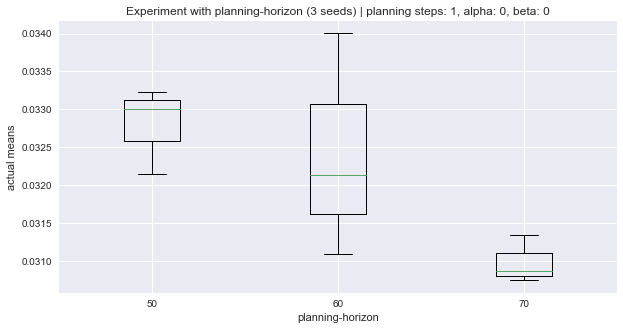

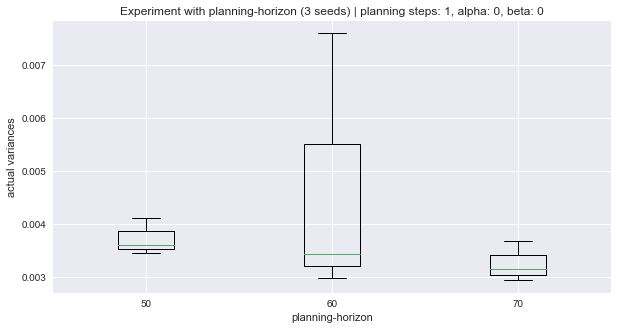

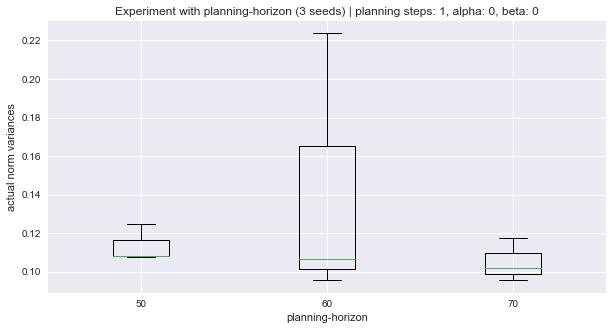

In [7]:
box_plot("actual_means")
box_plot("actual_variances")
box_plot("actual_norm_variances")

## Plotting predicted utilization (from EPOS)

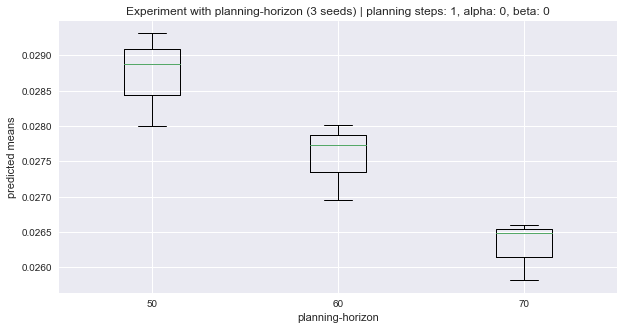

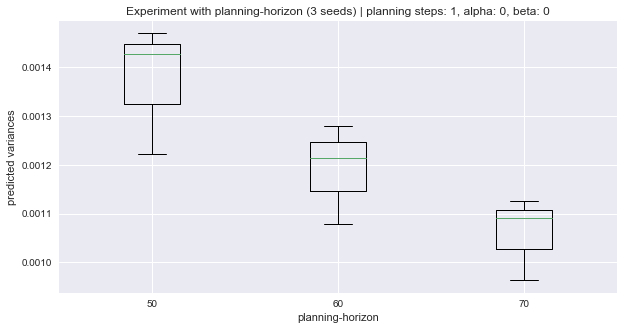

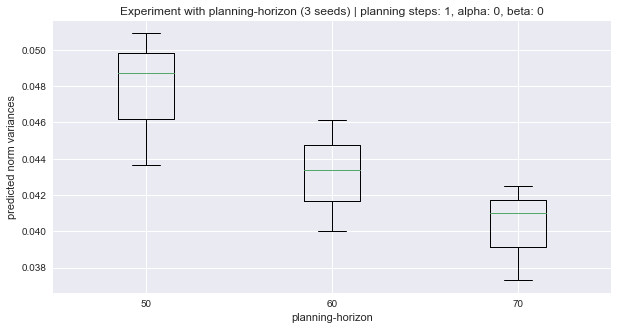

In [8]:
box_plot("predicted_means")
box_plot("predicted_variances")
box_plot("predicted_norm_variances")

## Plotting erros in utilization (actual minus predicted)

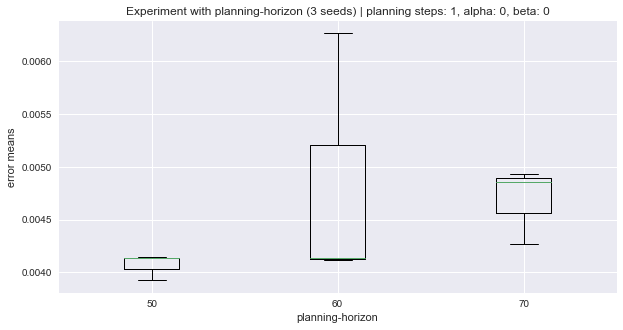

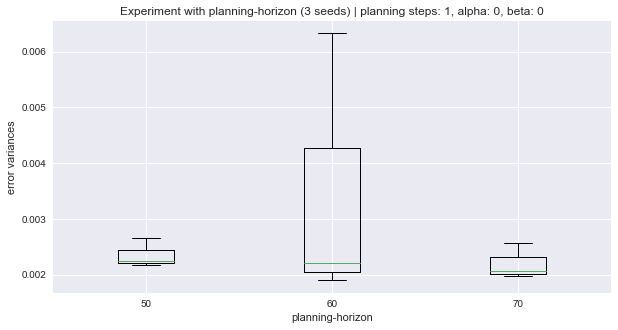

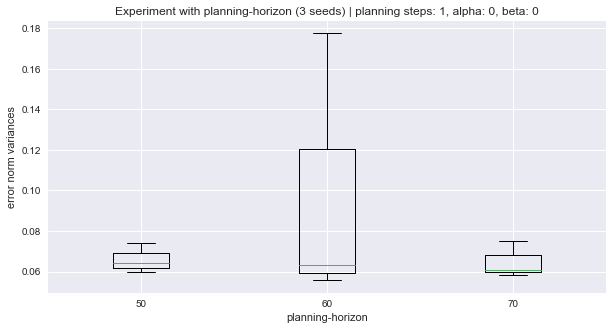

In [9]:
box_plot("error_means")
box_plot("error_variances")
box_plot("error_norm_variances")

## Probability densities over all data (all horizons)

/Users/gerostat/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


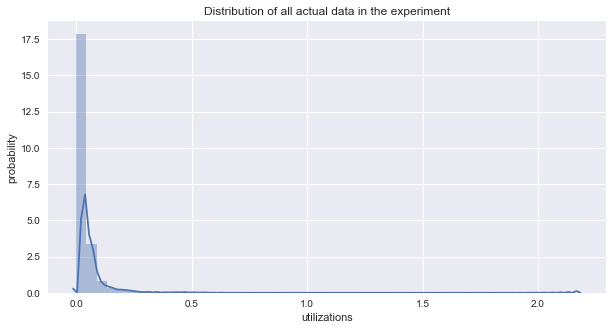

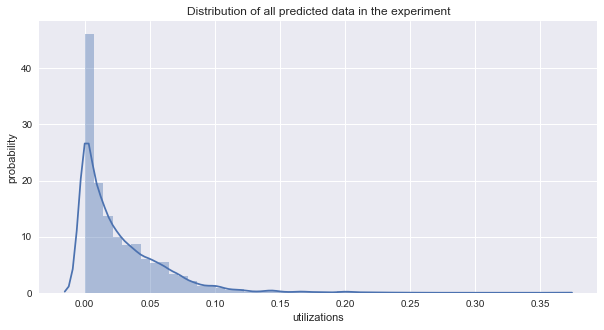

In [10]:
plot_density("actual")
plot_density("predicted")